## Trabajo práctico N1 - Ciencias de datos
Integrantes:
- Albino, Sebastián
- Pacheco Pilan, Federico
- Rodriguez, Alejandro

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

CSV_DIRECTORES = "Base Aprender directores 6 primaria 2022 – Muestral.csv"
CSV_ESTUDIANTES = "Base Aprender estudiantes 6 primaria 2022 – Muestral L y M.csv"

VALOR_BLANCO_INT = -9
VALOR_MULTIMARCA_INT = -6
VALOR_NODISP_INT = -8

COD_JURISDICCION = {
    2: "Ciudad Autónoma de Buenos Aires",
    6: "Buenos Aires",
    10: "Catamarca",
    14:	"Córdoba",
    18:	"Corrientes",
    22:	"Chaco",
    26:	"Chubut",
    30:	"Entre Ríos",
    34:	"Formosa",
    38:	"Jujuy",
    42:	"La Pampa",
    46:	"La Rioja",
    50:	"Mendoza",
    54:	"Misiones",
    58:	"Neuquén",
    62:	"Río Negro",
    66:	"Salta",
    70:	"San Juan",
    74:	"San Luis",
    78:	"Santa Cruz",
    82:	"Santa Fe",
    86:	"Santiago del Estero",
    90:	"Tucumán",
    94:	"Tierra del Fuego, Antártida e Islas del Atlántico Sur"
}

df_directores = pd.read_csv("dataset/" + CSV_DIRECTORES, sep=";")
df_estudiantes = pd.read_csv("dataset/" + CSV_ESTUDIANTES, sep=";")

C:\Users\rodri\AppData\Local\Temp\ipykernel_18520\3122024671.py:39: DtypeWarning: Columns (6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estudiantes = pd.read_csv("dataset/" + CSV_ESTUDIANTES, sep=";")


In [4]:
df_directores.head()

,ID1,c_jurisdiccion,anio,sector,ambito,dp01,dp02d,dp02u,Edad,dp03a,...,dp44b,dp44c,dp44d,dp44e,dp45a,dp45b,dp45c,dp45d,ponder,region
0,840066020084006,42,6,1,2,2,5,2,52,0,...,0,0,1,0,1,-9,-9,-9,"1,25",SUR
1,135720020280781,26,6,1,1,1,4,1,41,0,...,-9,-9,-9,-9,1,1,1,1,"1,5073273",SUR
2,259600127602225,58,6,1,2,2,5,0,50,0,...,0,0,0,1,-9,-9,2,-9,"5,4848485",SUR
3,957008580009570,26,6,1,1,2,5,8,58,0,...,0,0,0,1,1,-9,1,1,"1,5073273",SUR
4,221001326000221,78,6,1,1,2,4,6,46,0,...,1,1,1,0,2,2,3,2,"1,3846154",SUR


In [5]:
df_estudiantes.head()

,jurisdiccion,ID1,seccion,idalumno,sector,ambito,ap01,ap02,ap03,ap04,...,lpuntaje,mpuntaje,NSE_puntaje,NSE_nivel,edadA_junio2022,migracion,sobreedad,Nivel_Ed_Madre,Nivel_Ed_Padre,Nivel_Ed_Persona_Resp
0,2,396970010637139,2,22,2,2,,,,,...,"497,61646","395,31659",,,,,,,,
1,2,396970010637139,2,18,2,2,,,,,...,"440,10049","414,74878",,,,,,,,
2,2,396970010637139,1,18,2,2,,,,,...,"608,22382","549,40967",,,,,,,,
3,2,971700824929717,2,10,1,2,,,,,...,"582,31982","526,39301",,,,,,,,
4,2,971700824929717,1,23,1,2,,,,,...,"381,68524","418,19516",,,,,,,,


#### 0. Métodos útiles

In [6]:
# Transforma los registros de la serie entregada como parametro a numeros enteros y elimina los registros con " " (espacio), ‘Blanco’, ‘Multimarca’ y 'No disponible'  
# Ej serie: df_estudiantes["ap12d"], df_estudiantes["ap01"]
def limpiar_col(serie):
    # Filtro para string vacio
    filtro_vacio = serie != " "
    # Eliminamos registros vacios (" ")
    new_serie = serie[filtro_vacio]

    # Pasamos a int los valores de la columna
    new_serie = new_serie.astype(int)

    # Filtro para valores en Blanco, Multimarca o No disponoible
    filtro_blanco_int = new_serie != VALOR_BLANCO_INT
    filtro_multimarca_int = new_serie != VALOR_MULTIMARCA_INT
    filtro_nodisp_int = new_serie != VALOR_NODISP_INT

    # Eliminamos los registros con valores en ‘Blanco’, ‘Multimarca’ o 'No disponible'.
    new_serie = new_serie[filtro_blanco_int & 
                          filtro_multimarca_int & 
                          filtro_nodisp_int 
                         ]
    
    return new_serie


#### 1. Proporción muestras con y sin acceso a internet.

In [7]:
estudiantes_internet = limpiar_col(df_estudiantes["ap12d"])
estudiantes_internet.value_counts()

ap12d
1    108171
2      9731
Name: count, dtype: int64

Text(0.5, 1.0, 'Proporción de estudiantes con internet')

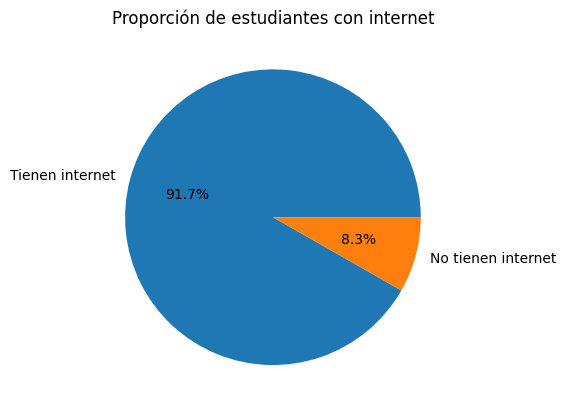

In [8]:
# Graficar proporcion de los que tienen internet y los que no
fig, ax = plt.subplots()

labels = ["Tienen internet", "No tienen internet"]
ax.pie(estudiantes_internet.value_counts(), labels=labels, autopct='%1.1f%%')

ax.set_title("Proporción de estudiantes con internet")

#### 2. Porcentaje de estudiantes mayores de 13 años

In [9]:
estudiantes_edad = limpiar_col(df_estudiantes["ap01"])
#estudiantes_edad.value_counts()
estudiantes_edad = estudiantes_edad == 5

Text(0.5, 1.0, 'Proporción de estudiantes mayores y menores o iguales de 13 años')

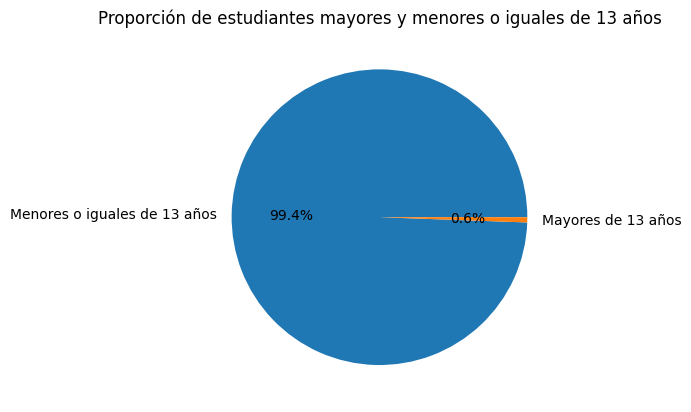

In [10]:
# Graficar proporcion de los estudiantess que son mayores de 13 y no lo son
fig, ax = plt.subplots()

labels = ["Menores o iguales de 13 años", "Mayores de 13 años"]
ax.pie(estudiantes_edad.value_counts(), labels=labels, autopct='%1.1f%%')

ax.set_title("Proporción de estudiantes mayores y menores o iguales de 13 años")

#### 3. Proporción de muestras de las 10 jurisdicciones con mayor cantidad de estudiantes.

In [11]:
# Verificar que no haya registros vacios o outliers
df_estudiantes["jurisdiccion"].unique()

array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66,
       70, 74, 78, 82, 86, 90, 94], dtype=int64)

In [12]:
# Agrupar los registros por jurisdiccion, contar la cantidad de registros de cada una, ordenar los valores por la columna idalumno (aunque podrian usarse otros atributos), y quedarse con los 10 primeros
cant_jurisdicciones = 10
juridiscciones_con_mas_estudiantes = df_estudiantes.groupby("jurisdiccion").count().sort_values("idalumno", ascending = False).iloc[:cant_jurisdicciones]
# Agregar un nuevo indice para que jurisdiccion no se utilizado como indice
juridiscciones_con_mas_estudiantes.reset_index(inplace = True)

C:\Users\rodri\AppData\Local\Temp\ipykernel_18520\712191998.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  juridiscciones_con_mas_estudiantes.reset_index(inplace = True)


Text(0.5, 1.0, 'Proporción de estudiantes para las 10 jurisdicciones con mayor cantidad de estudiantes')

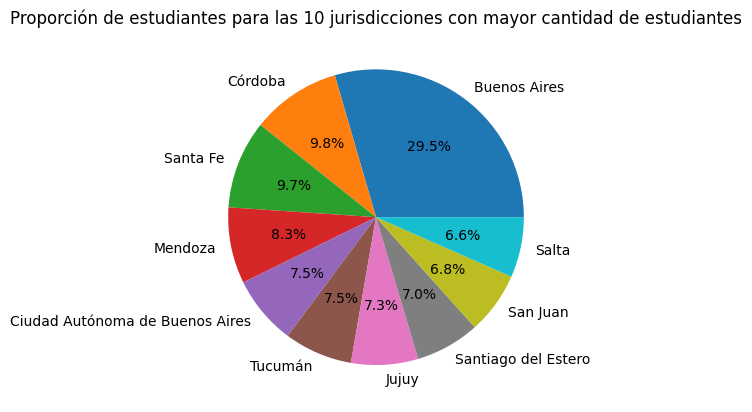

In [13]:
fig, ax = plt.subplots()

# Obtener los nombres de los codigos de jurisdiccion
jurisdicciones = [COD_JURISDICCION[j] for j in juridiscciones_con_mas_estudiantes["jurisdiccion"]]

ax.pie(juridiscciones_con_mas_estudiantes["idalumno"], labels=jurisdicciones, autopct='%1.1f%%')

ax.set_title("Proporción de estudiantes para las 10 jurisdicciones con mayor cantidad de estudiantes")

#### 4. Proporción de muestras con residencia rural y urbana.


In [14]:
# Verificar que no haya registros vacios o outliers
df_estudiantes['ambito'].unique()

array([2, 1], dtype=int64)

In [15]:
# Verificar que no haya registros vacios o outliers
df_directores['ambito'].unique()

array([2, 1], dtype=int64)

In [16]:
df_unido = pd.concat([df_estudiantes, df_directores])
 
print("Forma del dataframe de estudiantes: ", df_estudiantes.shape)
print("Forma del dataframe de directores: ", df_directores.shape)
print("Forma del dataframe concatenado: ", df_unido.shape)

Forma del dataframe de estudiantes:  (128482, 117)
Forma del dataframe de directores:  (3696, 170)
Forma del dataframe concatenado:  (132178, 283)


Text(0.5, 1.0, 'Proporción de muestras que viven en ámbito rural o urbano')

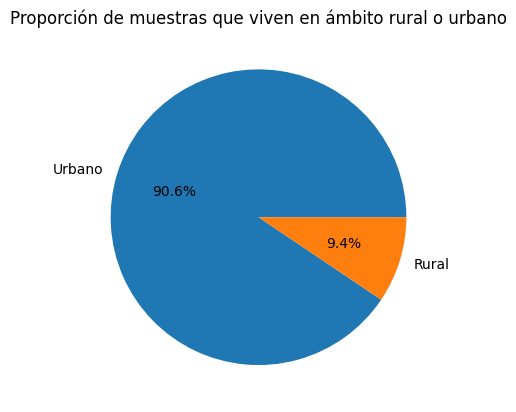

In [17]:
fig, ax = plt.subplots()
 
labels = ["Urbano", "Rural"]
ax.pie(df_unido['ambito'].value_counts(), labels=labels, autopct='%1.1f%%')
 
ax.set_title("Proporción de muestras que viven en ámbito rural o urbano")

#### 5. Niveles de desempeño en matemática en el ámbito rural y urbano

In [18]:
# Verificar que no haya registros vacios o outliers
df_estudiantes["mdesemp"].unique()

array(['1', '2', '3', ' ', '4'], dtype=object)

In [19]:
# Limpiar valores " " y pasar a numero ("mdesemp")
filtro_vacio = df_estudiantes["mdesemp"] != " "

desemp_unique = df_estudiantes[filtro_vacio]
desemp_unique["mdesemp"] = desemp_unique["mdesemp"].astype(int)

desemp_unique["mdesemp"].unique()

C:\Users\rodri\AppData\Local\Temp\ipykernel_18520\2075885293.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desemp_unique["mdesemp"] = desemp_unique["mdesemp"].astype(int)


array([1, 2, 3, 4])

In [20]:
# Agrupar por ambito
desemp_ambito = desemp_unique.groupby("ambito")
desemp_ambito["mdesemp"].value_counts()

ambito  mdesemp
1       3           4307
        2           2467
        1           1953
        4           1552
2       3          48278
        2          23760
        4          19215
        1          18150
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x143b8ed5b10>,
 [Text(0.20175280898007505, 1.0813398189600942, 'Satisfactorio'),
  Text(-1.0464283434440043, -0.33909839580428164, 'Básico'),
  Text(-0.02569404137973085, -1.0996998755285812, 'Avanzado'),
  Text(0.9539491804912185, -0.5477051771164235, 'Por debajo del básico')],
 [Text(0.11004698671640456, 0.5898217194327786, '44.1%'),
  Text(-0.5707790964240023, -0.18496276134778997, '21.7%'),
  Text(-0.014014931661671372, -0.5998362957428623, '17.6%'),
  Text(0.5203359166315736, -0.2987482784271401, '16.6%')])

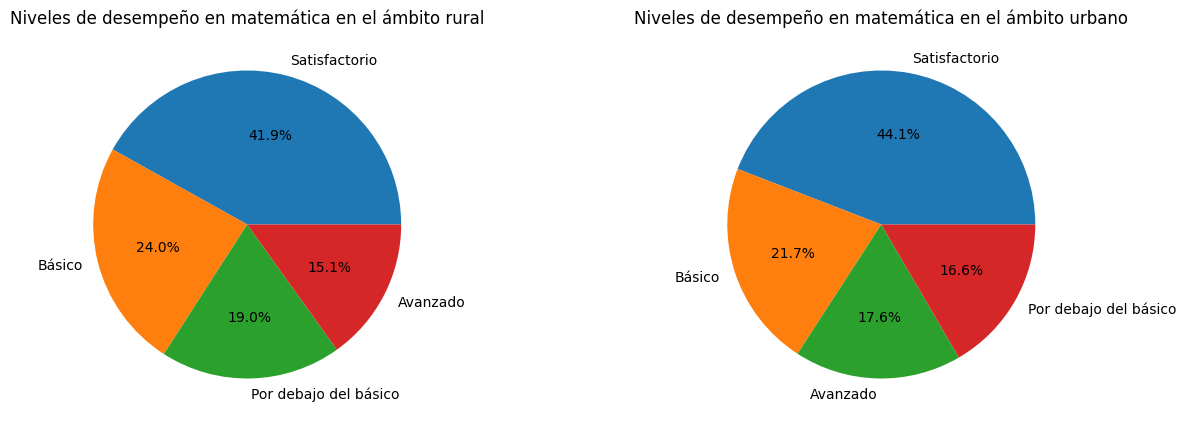

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))

# Rural
labels = ["Satisfactorio", "Básico", "Por debajo del básico", "Avanzado"]
ax[0].set_title("Niveles de desempeño en matemática en el ámbito rural")
ax[0].pie(desemp_ambito["mdesemp"].get_group(1).value_counts(), labels=labels, autopct='%1.1f%%')
# Urbano
labels = ["Satisfactorio", "Básico", "Avanzado", "Por debajo del básico"]
ax[1].set_title("Niveles de desempeño en matemática en el ámbito urbano")
ax[1].pie(desemp_ambito["mdesemp"].get_group(2).value_counts(), labels=labels, autopct='%1.1f%%') 

#### 6. Promedio de los puntajes en matemática y lengua en la provincia de Santa Fe.

In [22]:
# Filtro por Santa Fe
filtro_sf = df_estudiantes["jurisdiccion"] == 82
estudiantes_sf = df_estudiantes[filtro_sf]

In [23]:
estudiantes_sf[["mpuntaje","lpuntaje"]]

,mpuntaje,lpuntaje
3520,"481,41885","426,00357"
3521,"554,62329","499,49847"
3522,"452,96954",
3523,"467,93829","442,3382"
3524,"556,33777","591,84363"
...,...,...
128415,"412,80228","380,58011"
128416,,
128417,,"352,95807"
128418,"399,13705","413,4458"


In [29]:
# Limpiar valores " " y pasar a numero

# Matematica
filtro_mat_vacio = estudiantes_sf["mpuntaje"] != " "
estudiantes_mat_sf = estudiantes_sf[filtro_mat_vacio]

#estudiantes_mat_sf["mpuntaje"] = estudiantes_sf["mpuntaje"].astype(float) # '481,41885' que es este puntaje???
media_matematica = 10#estudiantes_mat_sf["mpuntaje"].mean()

# Lengua
filtro_len_vacio = estudiantes_sf["lpuntaje"] != " "
estudiantes_len_sf = estudiantes_sf[filtro_len_vacio]

#estudiantes_mat_sf["lpuntaje"] = estudiantes_sf["lpuntaje"].astype(float) # '481,41885' que es este puntaje???
media_lengua = 20#estudiantes_len_sf["lpuntaje"].mean()

print("Promedio de puntaje de matematica: ", media_matematica)
print("Promedio de puntaje de lengua:", media_lengua)

Promedio de puntaje de matematica:  10
Promedio de puntaje de lengua: 20


<BarContainer object of 2 artists>

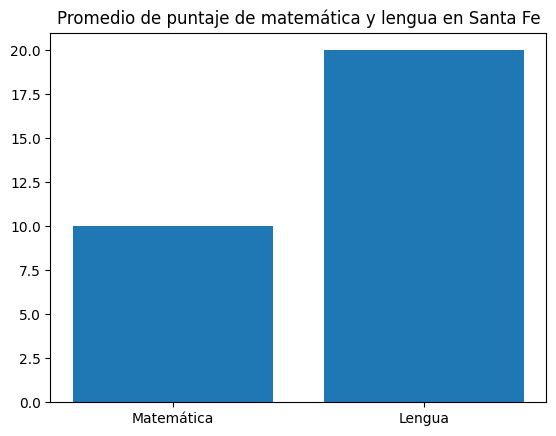

In [31]:
fig, ax = plt.subplots()
ax.set_title("Promedio de puntaje de matemática y lengua en Santa Fe")
ax.bar(["Matemática", "Lengua"], [media_matematica, media_lengua])